In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import PyMySQL
from sqlalchemy import create_engine

'''
db = PyMySQL.connect(user = 'student',
                     password = 'M3Sp?Wae]Pq)',
                     host = 'school-db.asqq.io',
                     dbname='mysql')
df = pd.read_sql_query('SELECT * FROM events_stats', db)

По идее вот так должно быть, но у меня проблема с модулем. Он установлен, но тут не может его найти
'''



ModuleNotFoundError: No module named 'PyMySQL'

In [2]:
df = pd.read_csv("events_stats.csv")

In [3]:
df.head()

,Unnamed: 0,user_id,ip_country,events,date
0,1,183,CA,app_install,2018-04-02
1,2,10287,UK,app_install,2018-04-06
2,3,1145,CA,start_session,2018-04-04
3,4,14324,UK,user_login,2018-04-04
4,5,9935,US,star_tutorial,2018-04-04


In [4]:
events = df['events']

In [16]:
ev_cnt = events.value_counts()

app_install        20861
start_session      20445
user_login         18984
star_tutorial      18358
end_tutorial       12934
start_level_1      12517
end_level_1         4381
purches_level_2     1564
Name: events, dtype: int64

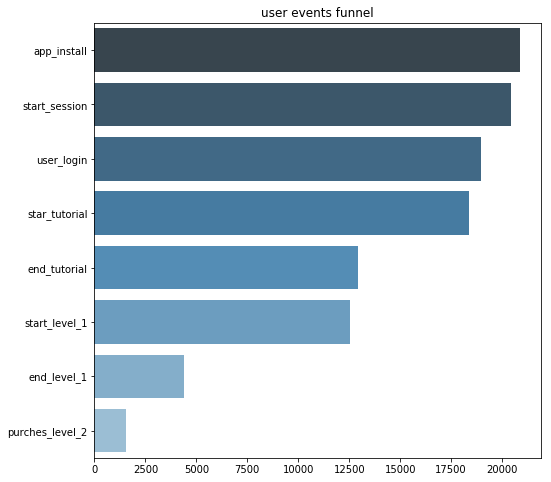

In [33]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

events_count  = df['events'].value_counts()
plt.figure(figsize=(8,8))
sns.barplot( events_count.values, events_count.index, palette="Blues_d")
plt.title('user events funnel')
plt.show()

# Второе задание

## Read one file

In [122]:
sec = pd.read_csv('wikrgroup\minimum_ga_data_2018-02-02_2018-02-02.csv',names = ['site', 'site_code', 'deviceCategory', 'countryIsoCode', 'date','hostname', 'users', 'newUsers', 'sessions', 'bounces','sessionDuration', 'hits', 'pageviews', 'uniquePageviews'], sep='\t', header=None,skiprows=[0])

In [165]:
sec.head()

,site,site_code,deviceCategory,countryIsoCode,date,hostname,users,newUsers,sessions,bounces,sessionDuration,hits,pageviews,uniquePageviews
0,marketium.ru ALL,80554925,desktop,RU,2018-02-02,marketium.ru,1,0,1,1,0.0,1,1,1
1,marketium.ru ALL,80554925,desktop,UA,2018-02-02,marketium.ru,2,0,2,2,0.0,2,2,2
2,marketium.ru ALL,80554925,desktop,UZ,2018-02-02,marketium.ru,1,0,1,1,0.0,1,1,1
3,marketium.ru ALL,80554925,mobile,AE,2018-02-02,marketium.ru,1,0,1,0,17.0,2,2,1
4,marketium.ru ALL,80554925,mobile,AM,2018-02-02,fabiosa.com,2,2,2,2,0.0,2,2,2


In [124]:
sec.describe()

,site_code,users,newUsers,sessions,bounces,sessionDuration,hits,pageviews,uniquePageviews
count,8.191000e+03,8191.000000,8191.000000,8191.000000,8191.000000,8.191000e+03,8.191000e+03,8.191000e+03,8.191000e+03
mean,1.487125e+08,623.411427,133.806129,954.484800,822.616042,4.204530e+04,1.171470e+03,1.160417e+03,1.102445e+03
std,1.464892e+07,10586.324951,2122.637921,16848.032183,14343.319702,7.951822e+05,2.092099e+04,2.071372e+04,1.971662e+04
min,8.055492e+07,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.364563e+08,1.000000,1.000000,1.000000,1.000000,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
50%,1.541195e+08,3.000000,2.000000,4.000000,3.000000,0.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00
75%,1.615648e+08,14.000000,6.000000,20.000000,17.000000,8.385000e+02,2.500000e+01,2.500000e+01,2.300000e+01
max,1.635494e+08,576585.000000,115959.000000,933045.000000,789559.000000,4.581051e+07,1.164351e+06,1.152692e+06,1.095880e+06


## Blend all this data together

In [125]:
import glob
path = r'C:\Users\Nick\Desktop\wikrgroup'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f,names = ['site', 'site_code', 'deviceCategory', 'countryIsoCode', 'date','hostname', 'users', 'newUsers', 'sessions', 'bounces','sessionDuration', 'hits', 'pageviews', 'uniquePageviews'], sep='\t', header=None,skiprows=[0]) for f in all_files)
concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
# doesn't create a list, nor does it append to one

In [126]:
concatenated_df.head()

,site,site_code,deviceCategory,countryIsoCode,date,hostname,users,newUsers,sessions,bounces,sessionDuration,hits,pageviews,uniquePageviews
0,marketium.ru ALL,80554925,desktop,RU,2018-02-01,marketium.lc,3,2,3,1,291.0,12,12,3
1,marketium.ru ALL,80554925,desktop,RU,2018-02-01,marketium.ru,2,0,2,2,0.0,2,2,2
2,marketium.ru ALL,80554925,desktop,UA,2018-02-01,marketium.ru,1,0,1,1,0.0,1,1,1
3,marketium.ru ALL,80554925,desktop,UZ,2018-02-01,marketium.ru,1,0,1,1,0.0,1,1,1
4,marketium.ru ALL,80554925,mobile,AM,2018-02-01,fabiosa.com,1,1,1,1,0.0,1,1,1


In [128]:
concatenated_df.describe()

,site_code,users,newUsers,sessions,bounces,sessionDuration,hits,pageviews,uniquePageviews
count,2.248130e+05,224813.000000,224813.000000,2.248130e+05,224813.000000,2.248130e+05,2.248130e+05,2.248130e+05,2.248130e+05
mean,1.490548e+08,635.920111,161.168545,9.623602e+02,825.501523,4.453867e+04,1.188586e+03,1.177489e+03,1.117042e+03
std,1.460243e+07,10574.629625,2446.365749,1.664516e+04,14134.139828,8.151690e+05,2.075002e+04,2.055109e+04,1.953422e+04
min,8.055492e+07,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.364563e+08,1.000000,1.000000,1.000000e+00,1.000000,0.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00
50%,1.541195e+08,3.000000,2.000000,4.000000e+00,3.000000,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
75%,1.615648e+08,15.000000,7.000000,2.100000e+01,18.000000,8.470000e+02,2.600000e+01,2.600000e+01,2.400000e+01
max,1.639210e+08,751641.000000,177031.000000,1.184505e+06,996003.000000,6.701147e+07,1.493195e+06,1.478959e+06,1.403388e+06


## Rate all site by sessions

In [129]:
concatenated_df.sort_values('sessions', ascending = False).head()

,site,site_code,deviceCategory,countryIsoCode,date,hostname,users,newUsers,sessions,bounces,sessionDuration,hits,pageviews,uniquePageviews
98592,Perfeito ALL,130851105,mobile,BR,2018-02-13,perfeito.guru,751641,177031,1184505,996003,64169268.0,1493195,1478959,1403388
41643,Perfeito ALL,130851105,mobile,BR,2018-02-06,perfeito.guru,710485,154611,1104666,949281,44094571.0,1357332,1344070,1277714
98750,Perfeito IA,130801582,mobile,BR,2018-02-13,perfeito.guru,684714,152307,1095862,916234,60505839.0,1391057,1377510,1308247
89978,Perfeito ALL,130851105,mobile,BR,2018-02-12,perfeito.guru,651119,138487,1050024,880190,59412291.0,1324910,1312092,1251151
25471,Perfeito ALL,130851105,mobile,BR,2018-02-04,perfeito.guru,637963,146284,1041156,889817,44883511.0,1285222,1272653,1210759


## Rate all site by pageviews

In [130]:
concatenated_df.sort_values('pageviews', ascending = False).head()

,site,site_code,deviceCategory,countryIsoCode,date,hostname,users,newUsers,sessions,bounces,sessionDuration,hits,pageviews,uniquePageviews
98592,Perfeito ALL,130851105,mobile,BR,2018-02-13,perfeito.guru,751641,177031,1184505,996003,64169268.0,1493195,1478959,1403388
98750,Perfeito IA,130801582,mobile,BR,2018-02-13,perfeito.guru,684714,152307,1095862,916234,60505839.0,1391057,1377510,1308247
41643,Perfeito ALL,130851105,mobile,BR,2018-02-06,perfeito.guru,710485,154611,1104666,949281,44094571.0,1357332,1344070,1277714
81746,Perfeito ALL,130851105,mobile,BR,2018-02-11,perfeito.guru,667463,154546,1040562,861019,67011469.0,1335060,1321537,1254989
89978,Perfeito ALL,130851105,mobile,BR,2018-02-12,perfeito.guru,651119,138487,1050024,880190,59412291.0,1324910,1312092,1251151


# What types of devices are more popular among user

In [131]:
concatenated_df['deviceCategory'].value_counts()

mobile     129192
tablet      48412
desktop     47209
Name: deviceCategory, dtype: int64

# What dynamics of the DAU (daily active users) metric is observed?

In [132]:
dau = concatenated_df.groupby('date')['users'].sum()

In [133]:
dau

date
2018-02-01    5478910
2018-02-02    5106363
2018-02-03    6162309
2018-02-04    5988222
2018-02-05    6137238
2018-02-06    5784004
2018-02-07    5525159
2018-02-08    5689540
2018-02-09    5386218
2018-02-10    5463383
2018-02-11    5952675
2018-02-12    5352852
2018-02-13    5242713
2018-02-14    4544586
2018-02-15    3929690
2018-02-16    3842813
2018-02-17    3919885
2018-02-18    4273825
2018-02-19    3975131
2018-02-20    5437950
2018-02-21    5070249
2018-02-22    5163816
2018-02-23    4924664
2018-02-24    5269740
2018-02-25    5523841
2018-02-26    4988709
2018-02-27    4546599
2018-02-28    4282024
Name: users, dtype: int64

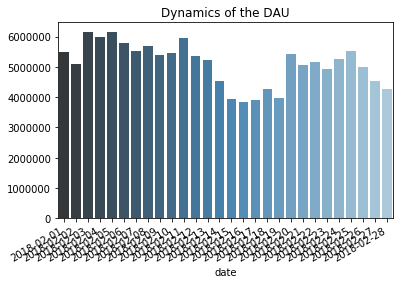

In [162]:
#plt.figure(figsize=(28,28))
sns.barplot(dau.index, dau.values, palette="Blues_d")
plt.title('Dynamics of the DAU')
plt.gcf().autofmt_xdate()
plt.show()

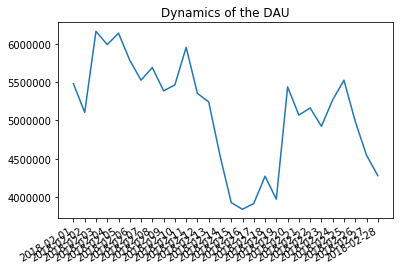

In [164]:
plt.plot(dau.index,dau.values)
plt.title('Dynamics of the DAU')
plt.gcf().autofmt_xdate()
plt.show()